<a href="https://colab.research.google.com/github/clairicelou/project_1_bsds/blob/main/Project1_DS3021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1

## Wrangling and EDA

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as lmf_parsed.cav. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

In [ ]:
! git clone https://github.com/clairicelou/project_1_bsds
%run ./project_1_bsds/get_data.py

Cloning into 'project_1_bsds'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 7.78 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Download complete
Extracting data files...
Data extracted


In [ ]:
import pandas as pd

mdf = pd.read_csv(
    '/content/project_1_bsds/linked_mortality_file_1999_2000.csv',
    encoding='latin1'
)

mdf.head()

,SEQN,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM
0,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1.0,6.0,0.0,0.0,177.0,177.0
2,3,2,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0.0,NaN,NaN,NaN,244.0,244.0


In [ ]:
mdf.columns

Index(['SEQN', 'ELIGSTAT', 'MORTSTAT', 'UCOD_LEADING', 'DIABETES', 'HYPERTEN',
       'PERMTH_INT', 'PERMTH_EXM'],
      dtype='object')

In [ ]:
gdf = pd.read_sas("project_1_bsds/DEMO.xpt", format="xport")

gdf.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,10094.017100,9912.461855,9727.078709,10041.524113,9.953956e+03,9857.381983,9865.152486,10327.992682,9809.165049,10323.315747
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27186.728682,27324.345051,28099.663528,27757.066921,2.804929e+04,26716.602006,26877.704909,27268.025234,27406.383620,26984.812909
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,43993.193099,44075.386428,46642.563799,44967.681579,4.457248e+04,44087.945688,44831.370881,44480.987235,45389.112766,43781.905637
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10702.307249,10531.444441,10346.119327,10636.063039,5.397605e-79,10533.108939,10654.749584,10851.024385,10564.981435,11012.529729
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,93164.782430,92119.608772,95388.490406,94131.383538,9.529781e+04,91325.082461,91640.586117,92817.926915,94282.855382,91993.251203


In [ ]:
df = gdf.merge(mdf, on="SEQN", how="inner")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP50,WTIREP51,WTIREP52,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,10327.992682,9809.165049,10323.315747,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27268.025234,27406.383620,26984.812909,1,1.0,6.0,0.0,0.0,177.0,177.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,44480.987235,45389.112766,43781.905637,2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10851.024385,10564.981435,11012.529729,2,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,92817.926915,94282.855382,91993.251203,1,0.0,NaN,NaN,NaN,244.0,244.0


Third, the variables ELIGSTAT, MORTSTAT, PERMTH_INT, and RIDAGEEX are particularly important. Look them up in the documentation and clearly describe them.





ELIGSTAT: ELIGSTAT is Eligibility Status for Mortality Follow-up. This tells us whether someone from the survey can be linked to mortality records. Eligible (1) means that they have enough information to check if they’re in mortality records. Even if someone is technically “ineligible” for matching, they’re still included in the files. Under 18 (2) means people under 18 aren’t included in the public data for this. And ineligible (3) means that they don’t have enough information to link to mortality records. It’s a way to know who can be tracked for mortality and who can’t.

MORTSTAT: The MORTSTAT variable is the final determination of vital status and should be used as an outcome variable to calculate survival. Each survey participant who is eligible for mortality follow-up is assigned a vital status code (0=Assumed alive, 1=Assumed deceased)

PERMTH_INT: The PERMTH_INT variable represents the number of person-months of follow-up from the household interview date to the date of death or the date of censoring in mortality studies.

RIDAGEEX: RIDAGEEX is an NHANES demographic variable that records a participant’s age in months at the time of their physical exam in the Mobile Examination Center (MEC). It provides a more precise age measure than age in years.

Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (MORTSTAT) and life expectancy (PERMTH_INT). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use .merge to combine your data into one complete dataframe. Document missing values.

**Answer: We selected this data because we were interested in seeing the correlation between alcohol and life expectancy. We wanted to learn about different aspects of alcohol, and how that could harm the health of a patient, and in turn, lead to lowering life expectancy**

In [ ]:
alq = pd.read_sas("project_1_bsds/ALQ.xpt", format="xport")

alq.head()


,SEQN,ALQ100,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150
0,2.0,1.0,NaN,24.0,3.0,1.0,5.397605e-79,NaN,2.0
1,5.0,1.0,NaN,4.0,1.0,3.0,1.200000e+01,3.0,2.0
2,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,1.0,NaN,6.0,3.0,1.0,5.397605e-79,NaN,2.0
4,12.0,1.0,NaN,2.0,2.0,3.0,1.000000e+00,3.0,1.0


In [ ]:
df = df.merge(alq, on="SEQN", how="inner")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,PERMTH_INT,PERMTH_EXM,ALQ100,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150
0,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,177.0,177.0,1.0,NaN,24.0,3.0,1.0,5.397605e-79,NaN,2.0
1,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,244.0,244.0,1.0,NaN,4.0,1.0,3.0,1.200000e+01,3.0,2.0
2,7.0,1.0,2.0,2.0,2.0,59.0,712.0,712.0,4.0,2.0,...,237.0,236.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,1.0,2.0,2.0,1.0,43.0,518.0,518.0,4.0,2.0,...,231.0,231.0,1.0,NaN,6.0,3.0,1.0,5.397605e-79,NaN,2.0
4,12.0,1.0,2.0,1.0,1.0,37.0,453.0,454.0,3.0,1.0,...,236.0,236.0,1.0,NaN,2.0,2.0,3.0,1.000000e+00,3.0,1.0


In [ ]:
df.isna().sum()

,0
SEQN,0
SDDSRVYR,0
RIDSTATR,0
RIDEXMON,0
RIAGENDR,0
...,...
ALQ120U,1793
ALQ130,1788
ALQ140Q,1788
ALQ140U,3465


After merging the data, I noticed that demographic variables had no missing values, but a lot of the alcohol questions (like ALQ120U, ALQ130, ALQ140Q, ALQ140U, and ALQ150) had missing entries. This makes sense because people who never drank weren’t asked the follow-up questions, so the missing values just reflect how the survey was designed.

Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using.

The numeric alcohol variables are skewed to the right, meaning that most people drink a little, but a few people drink a lot.


In [ ]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,PERMTH_INT,PERMTH_EXM,ALQ100,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150
count,4444.000000,4444.0,4444.0,4444.000000,4444.000000,4444.000000,4327.000000,4312.000000,4444.000000,4444.000000,...,4441.000000,4441.000000,4161.000000,1408.000000,3.519000e+03,2651.000000,2656.000000,2.656000e+03,979.000000,3519.000000
mean,4983.899865,1.0,2.0,1.592709,1.533303,49.889064,592.804252,593.638451,2.652340,2.065707,...,201.935825,201.139608,1.343427,1.455966,4.702472e+00,1.951339,3.099774,9.262048e+00,2.500511,1.820972
std,2863.442030,0.0,0.0,0.491385,0.498946,18.841213,218.069518,218.129306,1.158774,1.178700,...,66.139534,66.138613,0.515678,0.498234,3.984899e+01,0.863237,5.376049,5.974556e+01,0.790246,0.468208
min,2.000000,1.0,2.0,1.000000,1.000000,20.000000,240.000000,240.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,5.397605e-79,1.000000,1.000000
25%,2457.750000,1.0,2.0,1.000000,1.000000,33.000000,403.000000,404.000000,1.000000,1.000000,...,187.000000,186.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,5.397605e-79,2.000000,2.000000
50%,4979.500000,1.0,2.0,2.000000,2.000000,48.000000,572.000000,573.000000,3.000000,2.000000,...,235.000000,234.000000,1.000000,1.000000,2.000000e+00,2.000000,2.000000,5.397605e-79,3.000000,2.000000
75%,7454.500000,1.0,2.0,2.000000,2.000000,66.000000,779.000000,780.000000,3.000000,3.000000,...,242.000000,241.000000,2.000000,2.000000,3.000000e+00,3.000000,3.000000,2.000000e+00,3.000000,2.000000
max,9965.000000,1.0,2.0,2.000000,2.000000,85.000000,1018.000000,1019.000000,5.000000,5.000000,...,250.000000,249.000000,9.000000,2.000000,9.990000e+02,3.000000,99.000000,9.990000e+02,3.000000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Columns: 159 entries, SEQN to ALQ150
dtypes: float64(158), int64(1)
memory usage: 5.4 MB


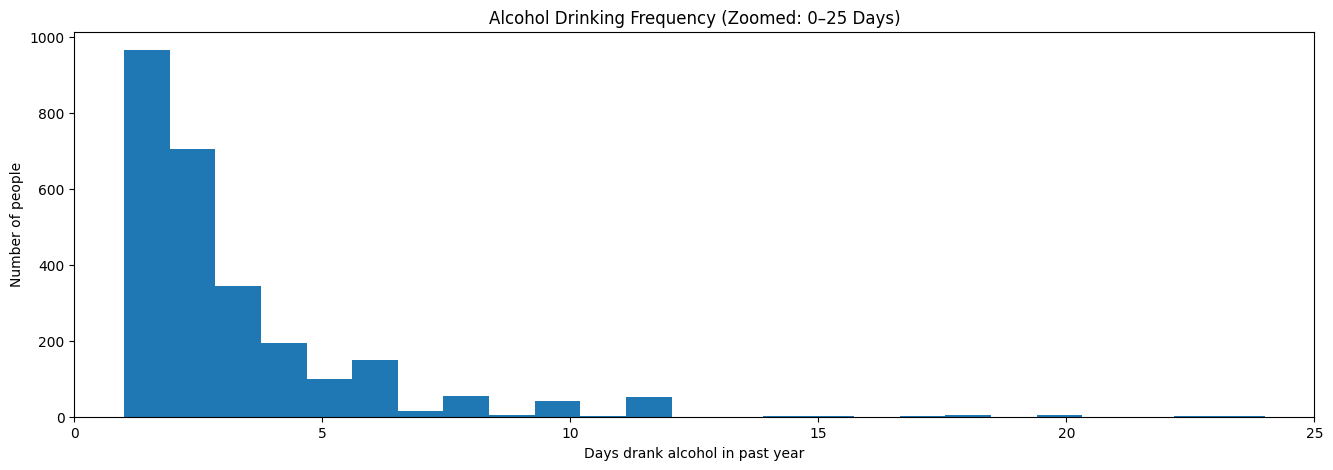

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

filtered = df['ALQ130'].dropna()
filtered = filtered[(filtered >= 0) & (filtered <= 25)]

plt.hist(filtered, bins=25)

plt.xlim(0, 25)

plt.title("Alcohol Drinking Frequency")
plt.xlabel("Days drank alcohol in past year")
plt.ylabel("Number of people")

plt.show()


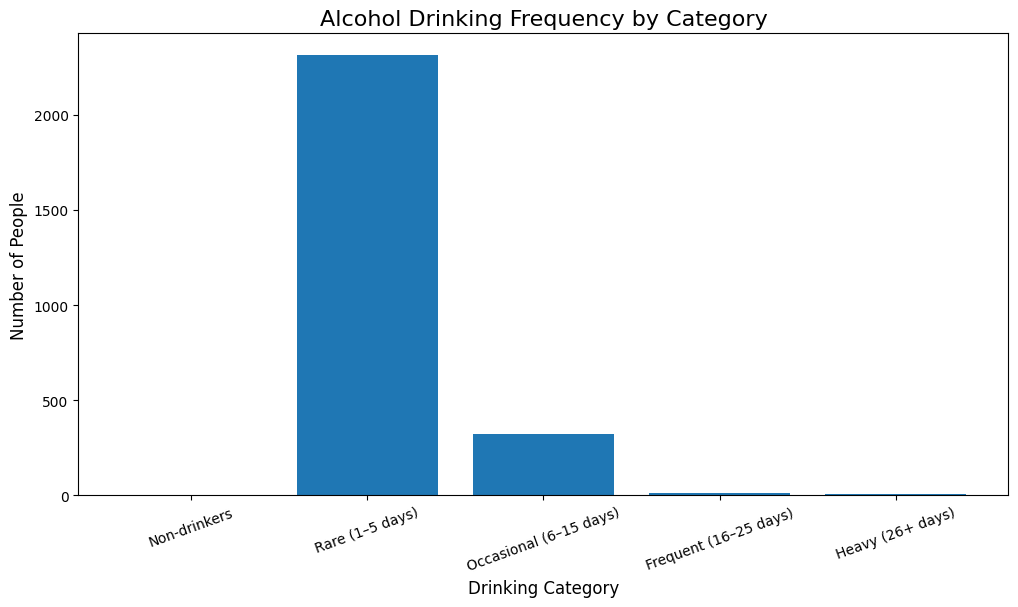

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get alcohol data
alq = df['ALQ130'].dropna()

# Create categories
categories = pd.cut(
    alq,
    bins=[-1, 0, 5, 15, 25, 365],
    labels=[
        "Non-drinkers",
        "Rare (1–5 days)",
        "Occasional (6–15 days)",
        "Frequent (16–25 days)",
        "Heavy (26+ days)"
    ]
)

# Count people in each category
counts = categories.value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(12,6))

plt.bar(counts.index, counts.values)

plt.title("Alcohol Drinking Frequency by Category", fontsize=16)
plt.xlabel("Drinking Category", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

plt.xticks(rotation=20)

plt.show()




## k-NN classification/regression & write-up

Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis?

Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice?

Using your variables to predict mortality using a k-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select k.

Using your variables to predict life expectancy using a k-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select k.

Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider?